In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

def preprocess(data, scaler, first_time):
    data["Energy_kcal"] = data["Energy_kcal"].round()
    data["Magnesium_mg"] = data.Magnesium_mg.astype(str)
    data["Magnesium_mg"] = pd.to_numeric(data["Magnesium_mg"], errors="coerce")
    data["VitE_mg"] = pd.to_numeric(data["VitE_mg"], errors="coerce")
    data["contains_B12"] = data["VitB12_mcg"] != 0.0

    num_cols = data.select_dtypes(include="number").columns
    if first_time:
        scaler.fit_transform(data[num_cols])
    else:
        scaler.transform()

def plot_graphs(data):
    sns.pairplot(train_data, vars=["Energy_kcal", "Protein_g", "Saturated_fats_g"], hue="contains_B12")
    sns.pairplot(train_data, vars=["Fat_g", "Carb_g", "Fiber_g"], hue="contains_B12")
    sns.pairplot(train_data, vars=["Calcium_mg", "Iron_mg", "Magnesium_mg"], hue="contains_B12")
    sns.pairplot(train_data, vars=["Phosphorus_mg", "Potassium_mg", "Sodium_mg"], hue="contains_B12")
    sns.pairplot(train_data, vars=["Zinc_mg", "Copper_mcg", "Manganese_mg"], hue="contains_B12")
    sns.pairplot(train_data, vars=["Selenium_mcg", "VitC_mg", "Thiamin_mg"], hue="contains_B12")
    sns.pairplot(train_data, vars=["Riboflavin_mg", "Niacin_mg", "Folate_mcg"], hue="contains_B12")
    sns.pairplot(train_data, vars=["VitB6_mg", "VitA_mcg", "VitE_mg", "VitD2_mcg"], hue="contains_B12")

data = pd.read_csv("ingredients.csv")
non_test_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, validation_data = train_test_split(non_test_data, test_size=0.25, random_state=42)
ss = StandardScaler()




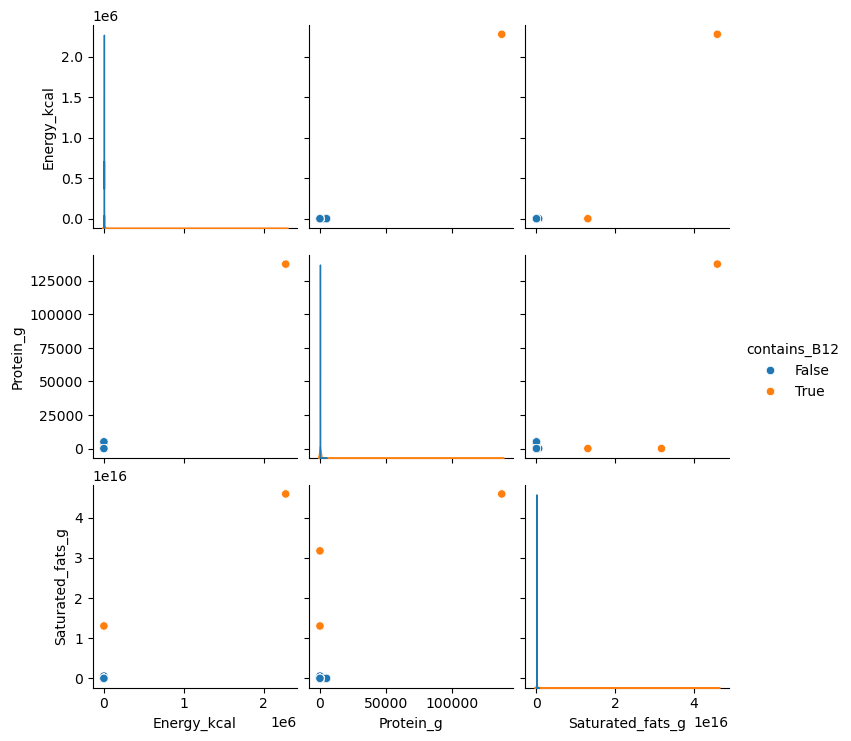

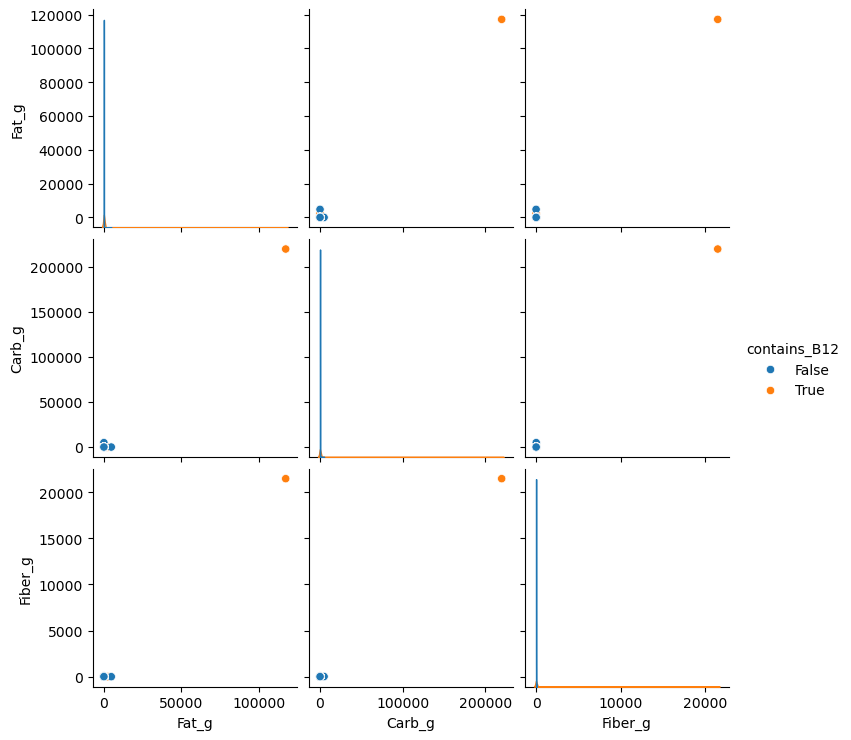

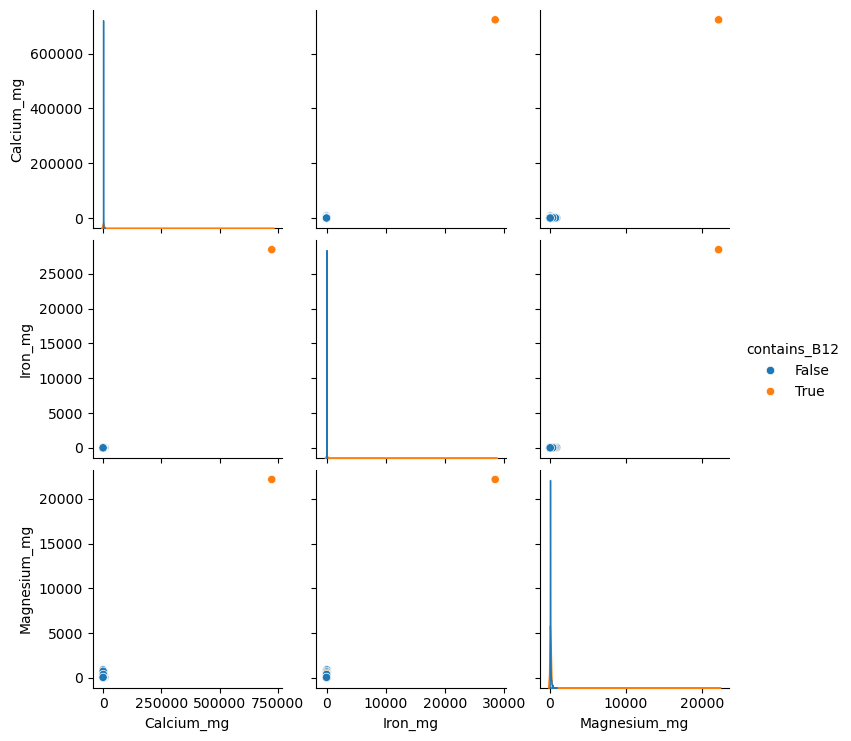

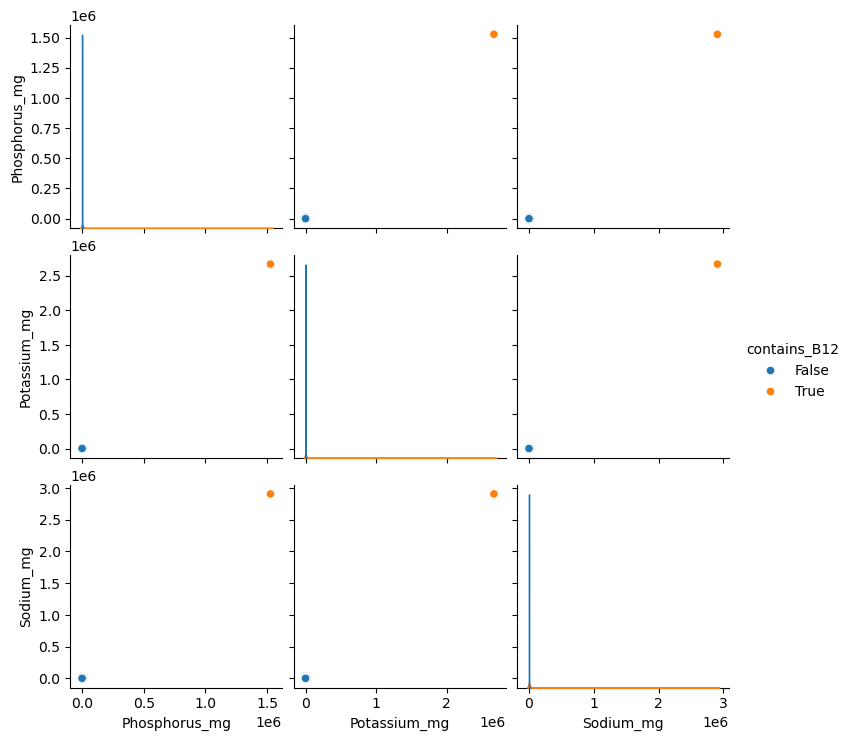

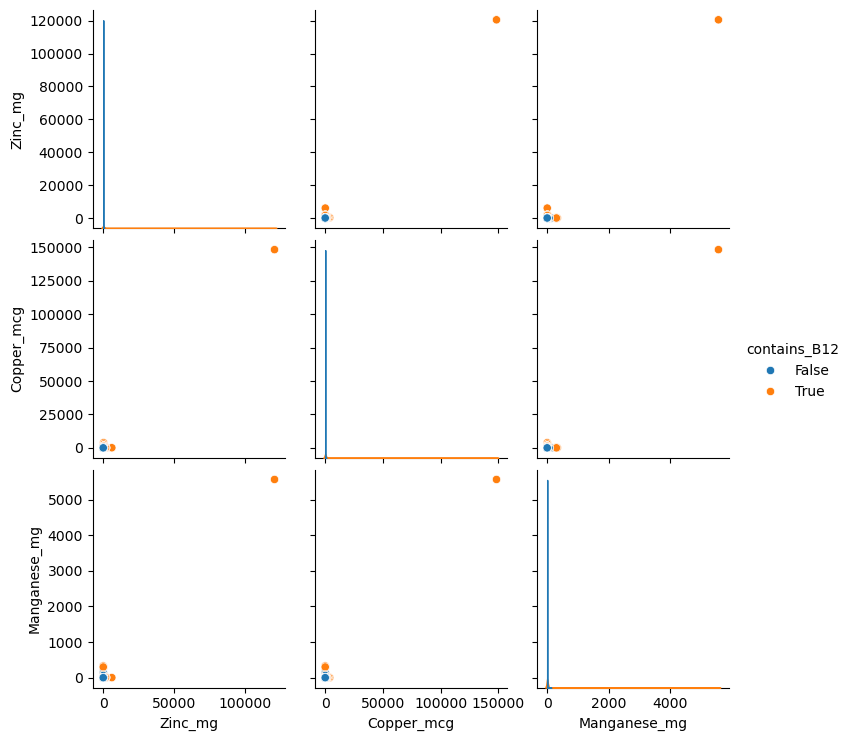

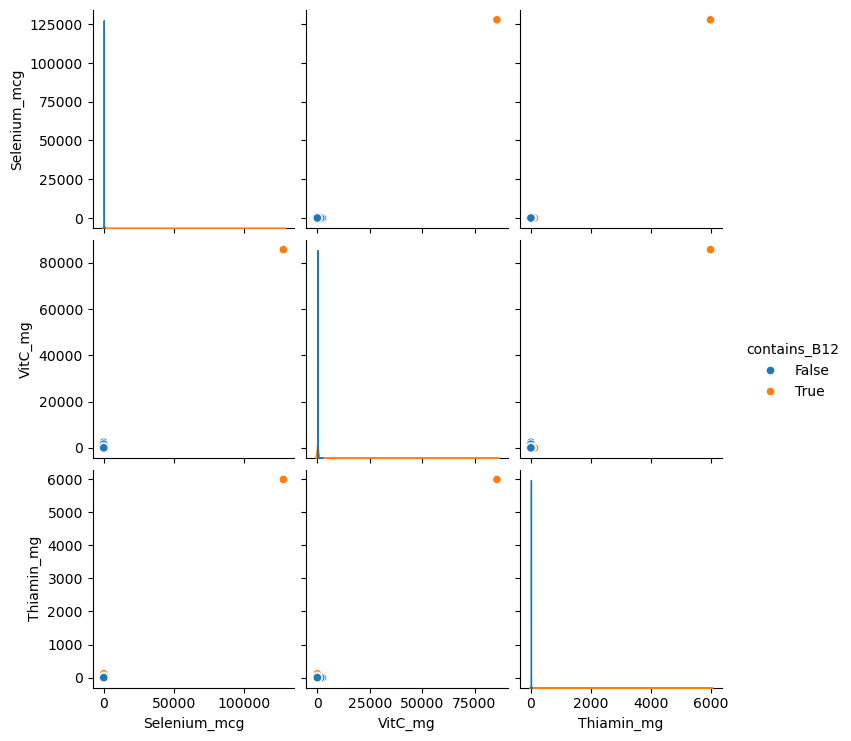

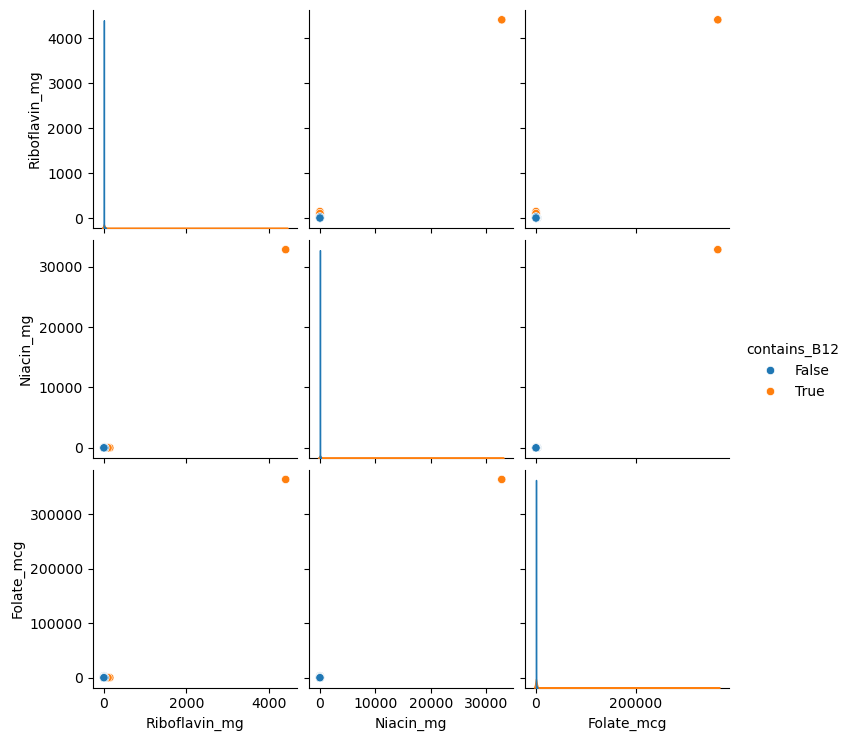

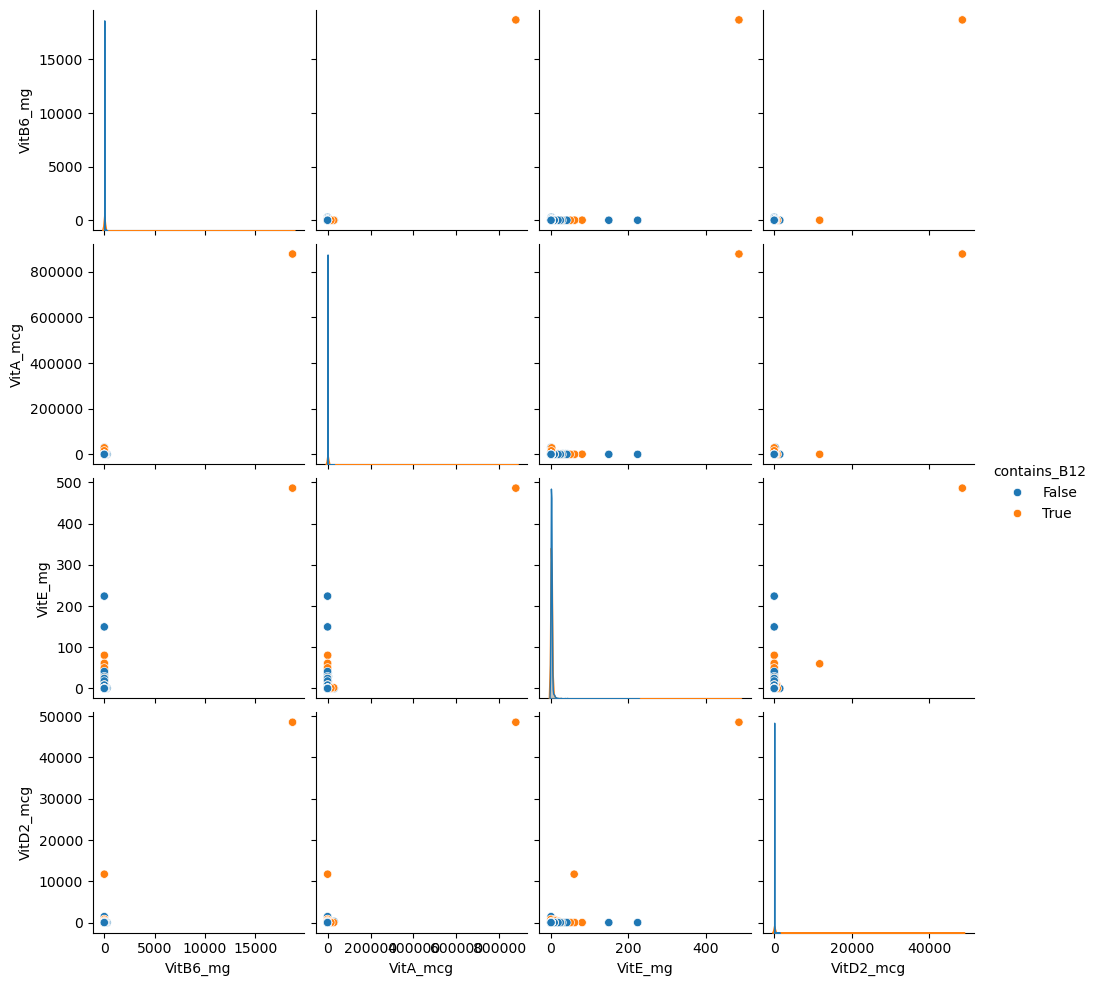

In [34]:
preprocess(train_data, ss, True)
plot_graphs(train_data)